### 1. Loading required Libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Importing dataset into 'client' dataframe

In [59]:
client = pd.read_csv("../dataset/credit_card_clients.csv")
client.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [60]:
client.dropna(inplace=True)

### 3. Description of Dataset

#### 3.1 Shape of Dataset

In [61]:
shape = client.shape
print(f"There are \033[1m {shape[0]} rows/patterns \033[0m and \033[1m{shape[1]} features\033[0m.")

There are  25134 rows/patterns  and 20 features.


#### 3.2 info

In [62]:
client.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,25134.0,5.078838e+06,41941.018788,5008806.0,5042228.25,5079004.0,5115603.75,5150487.0
CNT_CHILDREN,25134.0,5.123339e-01,0.787785,0.0,0.00,0.0,1.00,19.0
AMT_INCOME_TOTAL,25134.0,1.948339e+05,104510.987243,27000.0,135000.00,180000.0,225000.00,1575000.0
DAYS_BIRTH,25134.0,-1.479404e+04,3486.969790,-24611.0,-17438.00,-14547.0,-11964.00,-7489.0
DAYS_EMPLOYED,25134.0,-2.624941e+03,2339.224822,-15713.0,-3484.00,-1942.0,-979.00,-17.0
FLAG_MOBIL,25134.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
FLAG_WORK_PHONE,25134.0,2.738124e-01,0.445923,0.0,0.00,0.0,1.00,1.0
FLAG_PHONE,25134.0,2.927906e-01,0.455052,0.0,0.00,0.0,1.00,1.0
FLAG_EMAIL,25134.0,1.006605e-01,0.300885,0.0,0.00,0.0,0.00,1.0
CNT_FAM_MEMBERS,25134.0,2.294064e+00,0.947590,1.0,2.00,2.0,3.00,20.0


#### 3.3 Missing Values for features

In [63]:
[[features,client[features].isnull().sum()] for features in client.columns if client[features].isnull().sum()>0]

[]

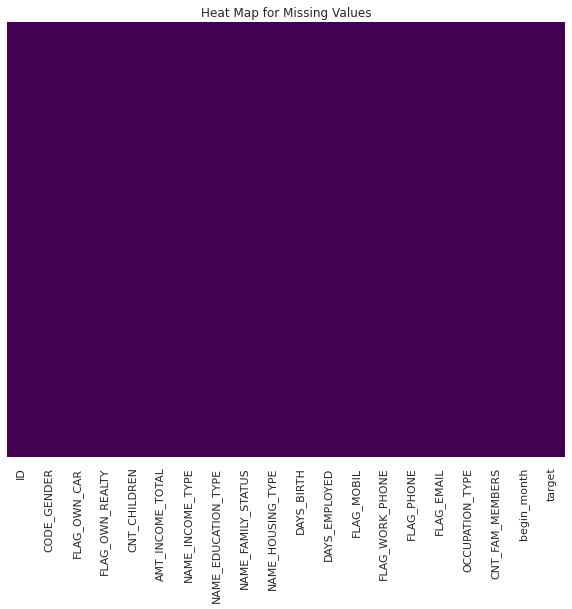

In [64]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Heat Map for Missing Values")
sns.heatmap(client.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Observation**:

There are **11323** Missing Values in OCCUPATION_TYPE.

#### 3.4 Correleation Heatmap

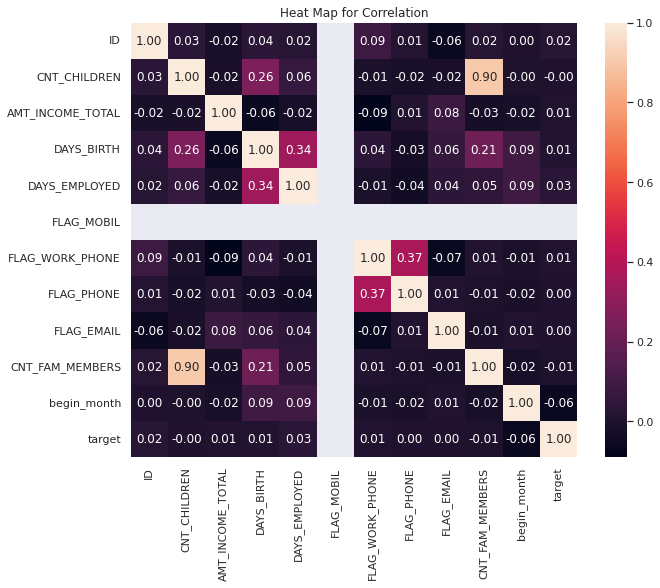

In [65]:
fig = sns.set(rc={'figure.figsize': (10, 8)})
plt.title("Heat Map for Correlation")
sns.heatmap(client.corr(), annot=True, fmt=".2f")
plt.show()

**Observation**:

Fraud is Highly Correlated to Amount.

#### 3.5 Removing Unnecessary Columns

In [66]:
remove_cols = ['ID', 'FLAG_MOBIL', 'FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']

for col in remove_cols:
    del client[col]

#### 3.6 Describing Dataset

In [67]:
client.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,begin_month,target
count,25134.000000,2.513400e+04,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,0.512334,1.948339e+05,-14794.037638,-2624.940877,2.294064,-26.120594,0.016790
std,0.787785,1.045110e+05,3486.969790,2339.224822,0.947590,16.439658,0.128486
min,0.000000,2.700000e+04,-24611.000000,-15713.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.350000e+05,-17438.000000,-3484.000000,2.000000,-39.000000,0.000000
50%,0.000000,1.800000e+05,-14547.000000,-1942.000000,2.000000,-24.000000,0.000000
75%,1.000000,2.250000e+05,-11964.000000,-979.000000,3.000000,-12.000000,0.000000
max,19.000000,1.575000e+06,-7489.000000,-17.000000,20.000000,0.000000,1.000000


#### 3.7 Box Plot for all Numerical Columns

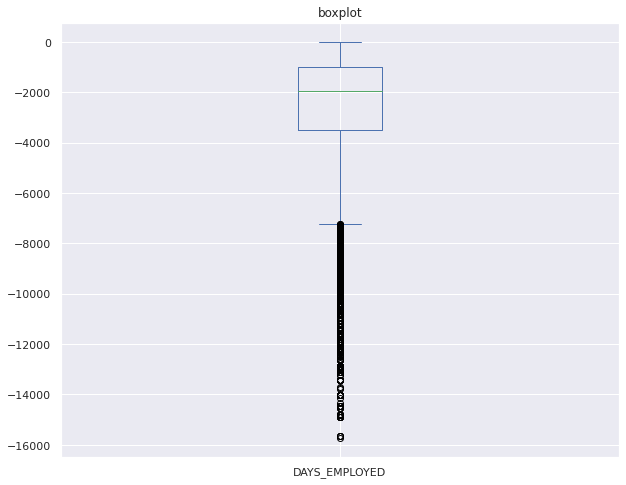

In [68]:
# Plot the dataframe
ax = client[['DAYS_EMPLOYED']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

**Observation**:

There are many many outliers in all columns.

#### 3.8 Checking if Dataset is Imbalance

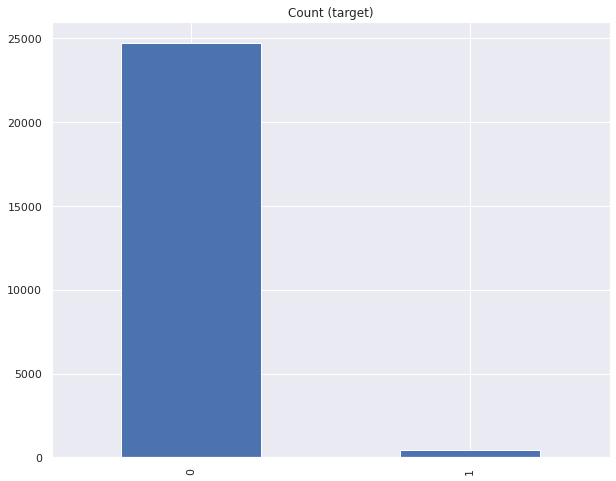

In [69]:
# to view class distribution
client['target'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

**Observation**:

The dataset is highly Imbalance.

#### 3.9 Countplot for Income Type

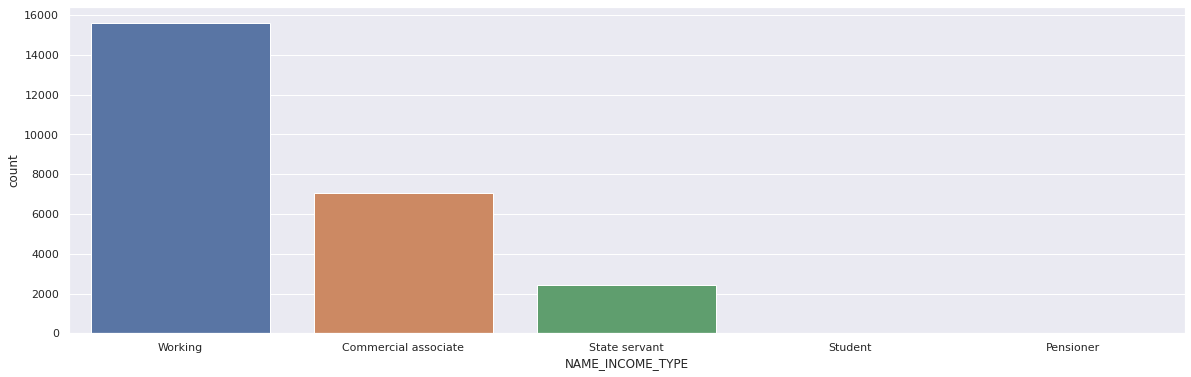

In [70]:
plt.figure(figsize=(20,6))
sns.countplot(x='NAME_INCOME_TYPE', data=client)
plt.show()

### 3.10 Countplot for Education Type

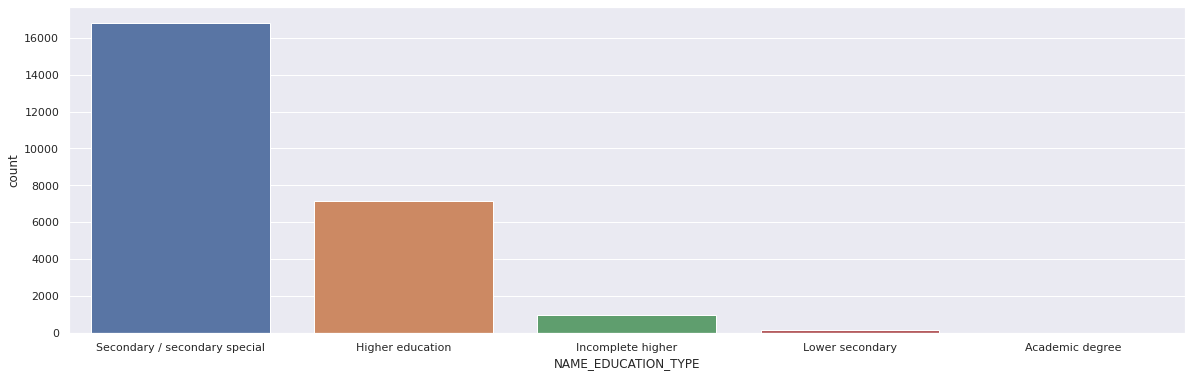

In [71]:
plt.figure(figsize=(20,6))
sns.countplot(x='NAME_EDUCATION_TYPE', data=client)
plt.show()

### 3.11 Countplot for House Type

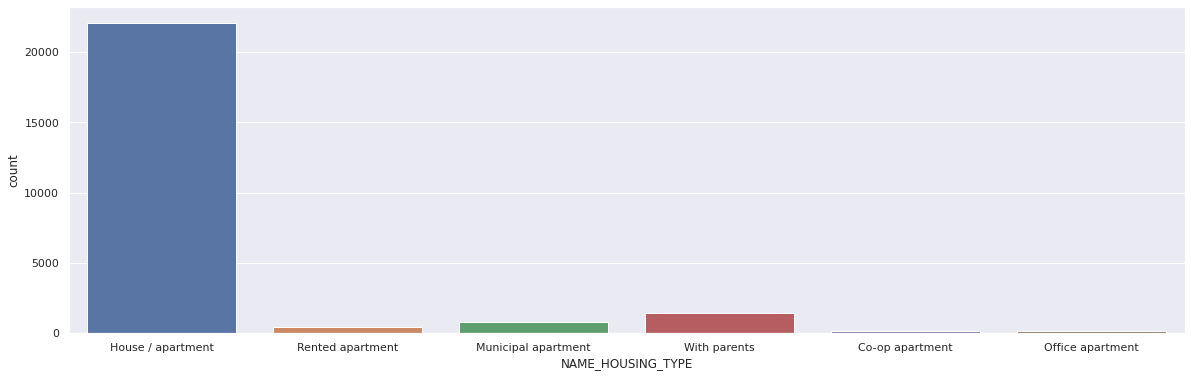

In [72]:
plt.figure(figsize=(20,6))
sns.countplot(x='NAME_HOUSING_TYPE', data=client)
plt.show()

### 3.11 Countplot for Gender Type

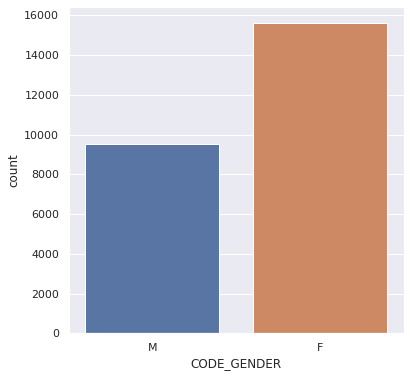

In [73]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'CODE_GENDER', data=client)
plt.show()

### 3.12 Countplot of Car owners

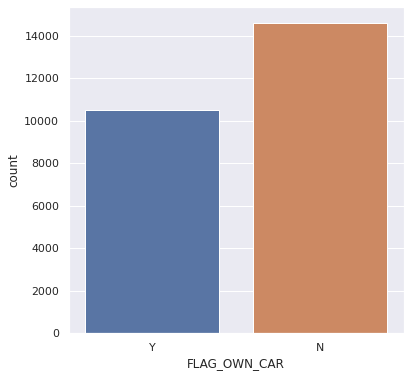

In [74]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'FLAG_OWN_CAR', data=client)
plt.show()

### 5. Feature Engineering

In [75]:
client["CODE_GENDER"] = client.CODE_GENDER.map({'M': 1, 'F': 0})
client["FLAG_OWN_CAR"] = client.FLAG_OWN_CAR.map({'Y': 1, 'N': 0})
client["FLAG_OWN_REALTY"] = client.FLAG_OWN_REALTY.map({'Y': 1, 'N': 0})

ohe_columns = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

In [76]:
def cal_birth(row):
    val = abs(row['DAYS_BIRTH']/365) + abs(row['begin_month']/12)
    return round(val,2)

In [77]:
def cal_exp_replace(row):
    if row['DAYS_EMPLOYED'] >= 0:
        val = 0
    else:
        val = row['DAYS_EMPLOYED']
    
    return val

In [78]:
def cal_exp(row):
    val = abs(row['DAYS_EMPLOYED']/365) + abs(row['begin_month']/12)
    return round(val,2)

In [79]:
client['DAYS_EMPLOYED'] = client.apply(cal_exp_replace, axis=1)
client['AGE'] = client.apply(cal_birth, axis=1)

median = client['DAYS_EMPLOYED'].mean()

client['DAYS_EMPLOYED'] = client['DAYS_EMPLOYED'].map({0 : median})

client['EXPERIENCE'] = client.apply(cal_exp, axis=1)

del client['DAYS_BIRTH']
del client['DAYS_EMPLOYED']

In [80]:
client['EXPERIENCE'].mode()

Series([], Name: EXPERIENCE, dtype: float64)

### 5. Building Pipeline

#### 5.2 Spliting Data into X and Y

In [81]:
del client['EXPERIENCE']
X = client.drop(columns =['target'])
y = client['target']

#### 5.3 Importing required libraries for creating pipeline

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#### 5.4 One Hot Encoding (Pipe 1)

In [99]:
X.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,AGE
2,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2.0,-29.0,61.25
3,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,-4.0,52.69
4,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,-26.0,54.52
5,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,-26.0,54.52
6,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,-38.0,55.52


In [84]:
ohe = OneHotEncoder()
ohe.fit(X[ohe_columns])

OneHotEncoder()

#### 5.5 Standard Scaler (Pipe 2)

In [85]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_),ohe_columns)
    ,remainder='passthrough'
    )

In [86]:
scaler = StandardScaler(with_mean=False)

#### 5.6 Models (Pipe 3)

In [87]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

#### 5.7 Making a Pipeline

In [88]:
pipe = make_pipeline(column_trans, scaler,rf)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Commercial associate', 'Pensioner', 'State servant', 'Student',
       'Working'], dtype=object),
                                                                            array(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'], dtype=object),
                                                                            a...
       'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff',
       'Secretaries', 'Security staff', 'Waiters/barmen staff'],
      dtype=object)]),
                                                  ['NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'OCCUPATION_TYPE'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestclassifier', RandomForestClassifier())])

#### 5.8 Function Defination

##### 5.8.1 Function for training data through Pipeline

In [89]:
def train_model(X, y, transformer, scaler, model):
    X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    pipe = make_pipeline(transformer, scaler, model)
    pipe.fit(X_train, Y_train)
    y_pred = pipe.predict(x_test)
    
    return y_test, y_pred, pipe

##### 5.8.2 Function for Metrics Calculation

In [90]:
def metrics(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    return cm, acc, cr

### 6. Pushing Data into Pipeline

In [91]:
X.isna().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
begin_month            0
AGE                    0
dtype: int64

In [92]:
y_test, y_pred, pipe = train_model(X, y, column_trans, scaler, rf)

### 7. Calculating Metrics

In [93]:
cm, acc, cr = metrics(y_test, y_pred)

#### 7.1 Heatmap for Confusion Matrix

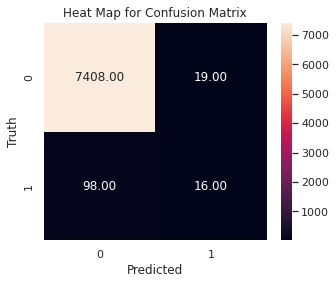

In [94]:
fig = sns.set(rc={'figure.figsize': (5, 4)})
plt.title("Heat Map for Confusion Matrix")
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

#### 7.2 Accuracy Score

In [95]:
print(f"The Accuracy Score is {acc * 100:.2f} %")

The Accuracy Score is 98.45 %


#### 7.3 Classification Report

In [96]:
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7427
           1       0.46      0.14      0.21       114

    accuracy                           0.98      7541
   macro avg       0.72      0.57      0.60      7541
weighted avg       0.98      0.98      0.98      7541



### 8. Dumping into Pickle file

In [97]:
import pickle
pickle.dump(pipe, open('../pickle/model.pkl','wb'))